# Boosting
## 분류기의과거학습결과를토대로학습결과가좋지않은(Weak learner)분류기의 학습데이터샘플에가중치를부여하여좀더정확도높은모델을만들어가는방법
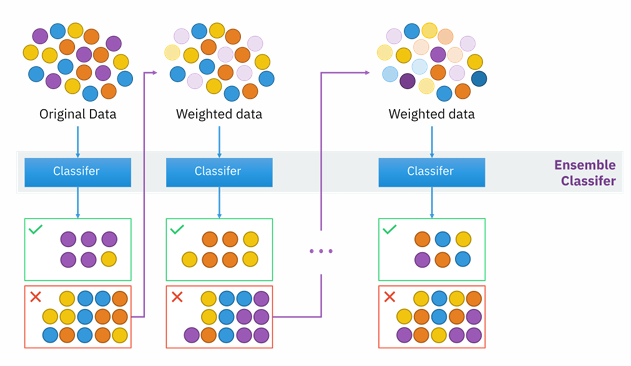

* 각 분류기를 거치며 점점 Weak learner 줄어들텐데 그렇다면 가장 마지막 모델만 사용하면 더 좋지않을까?
### X!
모든 약한 학습기의 가중 평균(또는 합) 이 더 일반화 성능이 좋기 때문임

In [1]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer, load_diabetes
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

iris = load_iris()
wine = load_wine()
cancer = load_breast_cancer()
diabetes = load_diabetes()
california = fetch_california_housing()

# ADA Boost Classifier

### iris

In [48]:
model = make_pipeline(StandardScaler(), AdaBoostClassifier())

cross_val = cross_validate(
    estimator=model,
    X=iris.data,
    y=iris.target,
    cv=5,
    scoring=["accuracy", "r2"],
)
print(f"Average Fit Time : {cross_val['fit_time'].mean()}")
print(f"Average Score Time : {cross_val['score_time'].mean()}")
print(f"Average Test Score : {cross_val['test_accuracy'].mean()}")
print(f"Average Test Score : {cross_val['test_r2'].mean()}")

Average Fit Time : 0.04586796760559082
Average Score Time : 0.005103397369384766
Average Test Score : 0.9533333333333334
Average Test Score : 0.93


### wine

In [4]:
cross_val = cross_validate(estimator=model, X=wine.data, y=wine.target, cv=5)
print(f"Average Fit Time : {cross_val['fit_time'].mean()}")
print(f"Average Score Time : {cross_val['score_time'].mean()}")
print(f"Average Test Score : {cross_val['test_score'].mean()}")

Average Fit Time : 0.05181269645690918
Average Score Time : 0.0037732601165771486
Average Test Score : 0.9333333333333332


### breast cancer

In [5]:
cross_val = cross_validate(estimator=model, X=cancer.data, y=cancer.target, cv=5)
print(f"Average Fit Time : {cross_val['fit_time'].mean()}")
print(f"Average Score Time : {cross_val['score_time'].mean()}")
print(f"Average Test Score : {cross_val['test_score'].mean()}")

Average Fit Time : 0.10449695587158203
Average Score Time : 0.008821821212768555
Average Test Score : 0.9683744760130415


# ADA BOOST Regressor

In [42]:
model = make_pipeline(StandardScaler(), AdaBoostRegressor())

### california

In [47]:
cross_val = cross_validate(
    estimator=model,
    X=california.data,
    y=california.target,
    cv=5,
    scoring=["neg_mean_squared_error", "r2"],
)

print(f"Average Fit Time : {cross_val['fit_time'].mean()}")
print(f"Average Score Time : {cross_val['score_time'].mean()}")
print(f"Average Test MSE : {-cross_val['test_neg_mean_squared_error'].mean()}")
print(f"Average Test R2  : {cross_val['test_r2'].mean()}")

Average Fit Time : 0.7236931800842286
Average Score Time : 0.010268688201904297
Average Test MSE : 0.8451709539857492
Average Test R2  : 0.3096666201703485


In [40]:
cross_val = cross_validate(
    estimator=model,
    X=california.data,
    y=california.target,
    cv=5,
)

print(f"Average Fit Time : {cross_val['fit_time'].mean()}")
print(f"Average Score Time : {cross_val['score_time'].mean()}")
print(f"Average Test Score : {cross_val['test_score'].mean()}")

Average Fit Time : 0.6940759181976318
Average Score Time : 0.0037984848022460938
Average Test Score : 0.33584869526224403


### diabetes

In [10]:
cross_val = cross_validate(estimator=model, X=diabetes.data, y=diabetes.target, cv=5)

print(f"Average Fit Time : {cross_val['fit_time'].mean()}")
print(f"Average Score Time : {cross_val['score_time'].mean()}")
print(f"Average Test Score : {cross_val['test_score'].mean()}")

Average Fit Time : 0.05227665901184082
Average Score Time : 0.001823568344116211
Average Test Score : 0.4188256697215425


# Gradient Boosting Classifier

In [13]:
model = make_pipeline(StandardScaler(), GradientBoostingClassifier())

### iris

In [14]:
model = make_pipeline(StandardScaler(), AdaBoostClassifier())

cross_val = cross_validate(estimator=model, X=iris.data, y=iris.target, cv=5)
print(f"Average Fit Time : {cross_val['fit_time'].mean()}")
print(f"Average Score Time : {cross_val['score_time'].mean()}")
print(f"Average Test Score : {cross_val['test_score'].mean()}")

Average Fit Time : 0.046938085556030275
Average Score Time : 0.001604175567626953
Average Test Score : 0.9533333333333334


### wine

In [15]:
cross_val = cross_validate(estimator=model, X=wine.data, y=wine.target, cv=5)
print(f"Average Fit Time : {cross_val['fit_time'].mean()}")
print(f"Average Score Time : {cross_val['score_time'].mean()}")
print(f"Average Test Score : {cross_val['test_score'].mean()}")

Average Fit Time : 0.048292922973632815
Average Score Time : 0.0057353973388671875
Average Test Score : 0.9333333333333332


### breast cancer

In [16]:
cross_val = cross_validate(estimator=model, X=cancer.data, y=cancer.target, cv=5)
print(f"Average Fit Time : {cross_val['fit_time'].mean()}")
print(f"Average Score Time : {cross_val['score_time'].mean()}")
print(f"Average Test Score : {cross_val['test_score'].mean()}")

Average Fit Time : 0.10869154930114747
Average Score Time : 0.00520792007446289
Average Test Score : 0.9666200900481291


# Gradient Tree Boostring Regressor

In [17]:
model = make_pipeline(StandardScaler(), GradientBoostingRegressor())

### california

In [18]:
cross_val = cross_validate(
    estimator=model, X=california.data, y=california.target, cv=5
)

print(f"Average Fit Time : {cross_val['fit_time'].mean()}")
print(f"Average Score Time : {cross_val['score_time'].mean()}")
print(f"Average Test Score : {cross_val['test_score'].mean()}")

Average Fit Time : 2.751428174972534
Average Score Time : 0.0020200252532958985
Average Test Score : 0.6698764508987038


### diabetes

In [20]:
cross_val = cross_validate(estimator=model, X=diabetes.data, y=diabetes.target, cv=5)

print(f"Average Fit Time : {cross_val['fit_time'].mean()}")
print(f"Average Score Time : {cross_val['score_time'].mean()}")
print(f"Average Test Score : {cross_val['test_score'].mean()}")

Average Fit Time : 0.07282509803771972
Average Score Time : 0.0005566120147705078
Average Test Score : 0.40871625429435243
